# <font color='#FFE15D'>**Week 14: SVM ⚞**</font>

## **🔸 Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **🔸 Perceptron (from Scratch)**

### Data

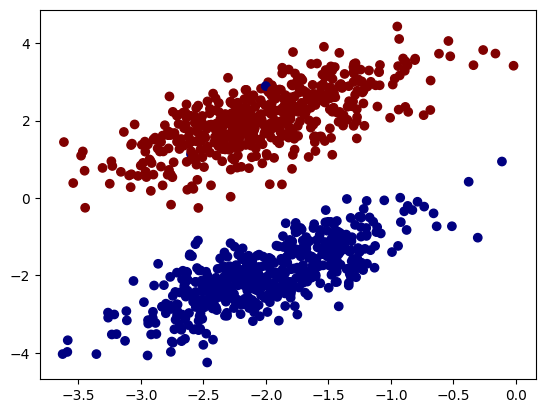

In [43]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2., random_state=12)
y = np.where(y==0, -1, y)[:, None]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

In [44]:
y

array([[ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],

### Model

In [45]:
class Perceptron:
    
    def __init__(self, in_features, n_iter=1000, eta=0.01, random_state=42):
        np.random.seed(random_state)
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.n_iter = n_iter
        self.eta = eta
        self.loss_hist = []
        
    def fit(self, X, y):
        # train loop
        for i in range(self.n_iter):
            y_hat = self.predict(X)
            loss = self._loss(y, y_hat)
            grad_w, grad_b = self._grad(X, y, y_hat)
            self.w -= self.eta * grad_w
            self.b -= self.eta * grad_b
            self.loss_hist.append(loss)
            
    def predict(self, x):
        return x @ self.w + self.b
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return self._accuracy(y, y_hat, t=0)
    
    def _accuracy(self, y, y_hat, t=0):
        y_hat = np.where(y_hat<t, -1, 1)
        acc = np.sum(y == y_hat) / len(y)
        return acc
    
    def _loss(self, y, y_hat):
        return np.maximum(0, -y*y_hat).mean()
    
    def _grad(self, x, y, y_hat):
        grad_w = (-y*x * np.heaviside(-y*y_hat, 1)).mean(axis=0).reshape(self.w.shape)
        grad_b = (-y * np.heaviside(-y*y_hat, 1)).mean(axis=0)
        return grad_w, grad_b

### Train

In [46]:
model = Perceptron(in_features=2, n_iter=1000, eta=0.01, random_state=2)
model.fit(X, y)

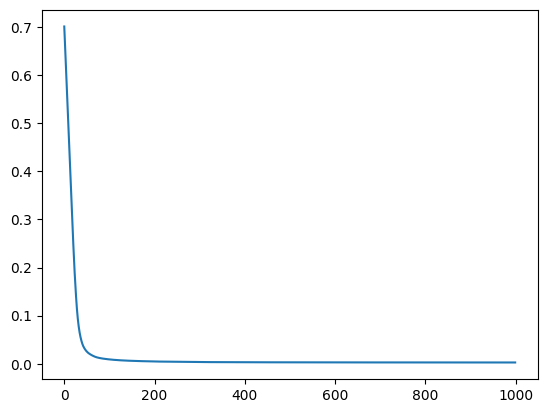

In [47]:
plt.plot(model.loss_hist)

In [48]:
model.loss_hist[-1]

0.0026303497626117716

### Evaluation

In [49]:
model.score(X, y)

0.993

### Decision Boundary

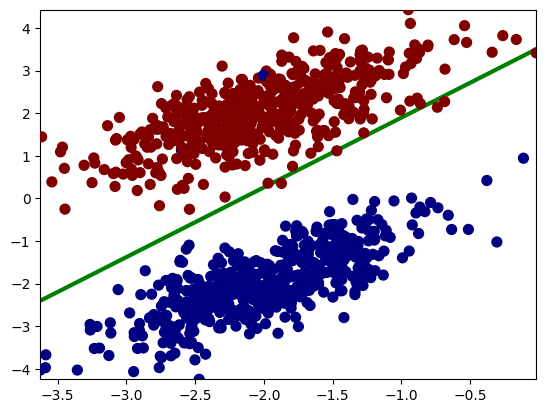

In [50]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

## **🔸 Simplified SVM (from Scratch)**

### Data

(998, 2) (998,)


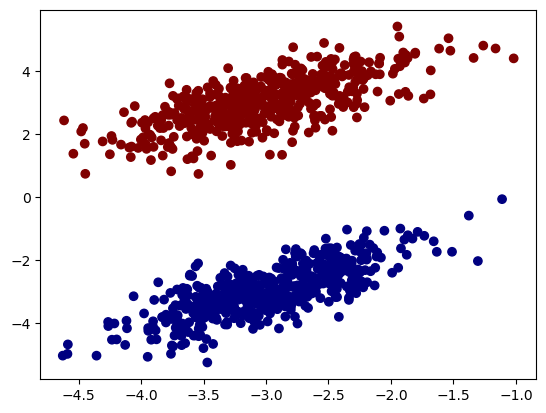

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

flags = np.ones((1000), dtype=np.bool_)
flags[[154, 770]] = False
X = X[flags, :]
y = y[flags]
print(X.shape, y.shape)
y = np.where(y==0, -1, y)[:, None]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

### Model

In [52]:
class SVM:
    
    def __init__(self, in_features, n_iter=1000, eta=0.01, c=1., random_state=42):
        # np.random.seed(random_state)
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        # self.w = np.zeros((in_features, 1))
        # self.b = 0
        self.n_iter = n_iter
        self.eta = eta
        self.c = c
        self.loss_hist = []
        
    def fit(self, X, y):
        # train loop
        for i in range(self.n_iter):
            y_hat = self.predict(X)
            # false predictions
            mask = np.squeeze((1 - y*y_hat) > 0)
            if mask.sum() == 0:
                print(i, 'break!')
                break
            loss = self._loss(y, y_hat, mask)
            grad_w, grad_b = self._grad(X, y, y_hat, mask)
            self.w -= self.eta * grad_w
            self.b -= self.eta * grad_b
            self.loss_hist.append(loss)
            
    def predict(self, x):
        return x @ self.w + self.b
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return self._accuracy(y, y_hat, t=0)
    
    def _accuracy(self, y, y_hat, t=0):
        y_hat = np.where(y_hat<t, -1, 1)
        acc = np.sum(y == y_hat) / len(y)
        return acc
    
    def _loss(self, y, y_hat, mask):
        y_mask = y[mask]
        y_hat_mask = y_hat[mask]
        return np.maximum(0, 1-y_mask*y_hat_mask).mean()
    
    def _grad(self, x, y, y_hat, mask):
        x_mask = x[mask]
        y_mask = y[mask]
        # y_hat_mask = y_hat[mask]
        grad_w = (-y_mask*x_mask).mean(axis=0).reshape(self.w.shape) + self.c*self.w
        grad_b = (-y_mask).mean(axis=0)
        return grad_w, grad_b

### Train

In [53]:
model = SVM(in_features=2, n_iter=2000, eta=0.01, c=1., random_state=2)
model.fit(X, y)

889 break!


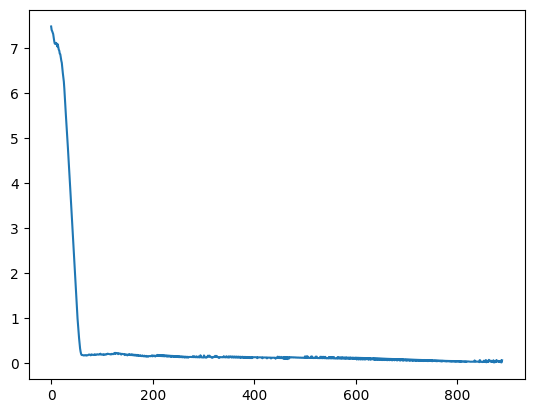

In [54]:
plt.plot(model.loss_hist)

In [55]:
model.loss_hist[-1]

0.052751893319926246

### Evaluation

In [56]:
model.score(X, y)

1.0

### Decision Boundary

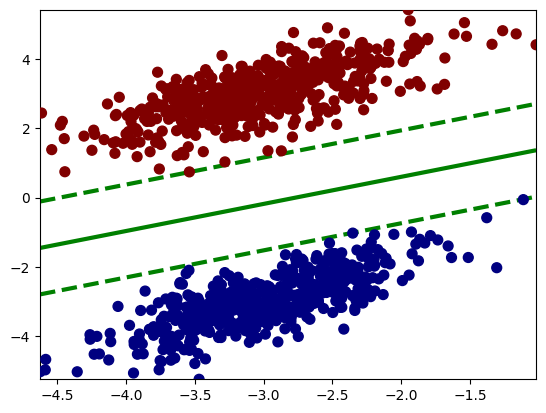

In [57]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

### `C`

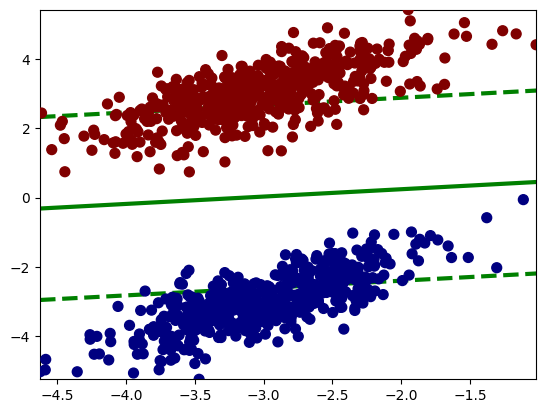

In [58]:
model = SVM(in_features=2, n_iter=2000, eta=0.01, c=5.5, random_state=2)
model.fit(X, y)

n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

## **🔸 Simplified SVM (sklearn)**

In [66]:
from sklearn.linear_model import SGDClassifier

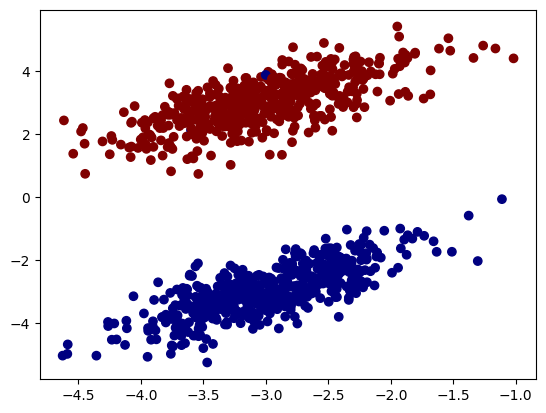

In [67]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

# flags = np.ones((1000), dtype=np.bool_)
# flags[[154, 770]] = False
# X = X[flags, :]
# y = y[flags]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

In [100]:
model = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=2000, tol=0.0001, random_state=23)
model.fit(X, y)

SGDClassifier(alpha=0.001, max_iter=2000, random_state=23, tol=0.0001)

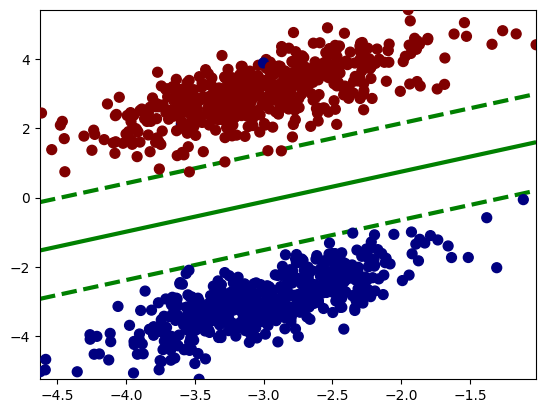

In [101]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

## **🔸 SVM (sklearn)**

In [165]:
from sklearn.svm import LinearSVC, SVC, NuSVC

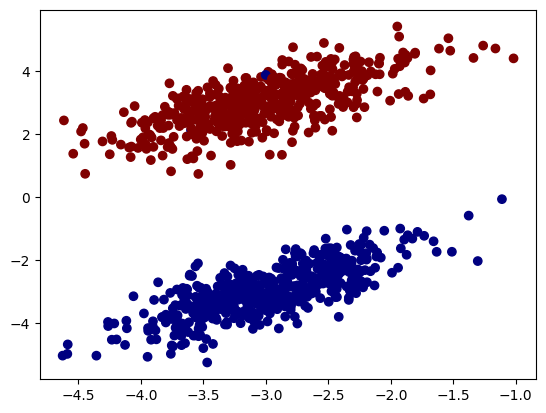

In [166]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

# flags = np.ones((1000), dtype=np.bool_)
# flags[[154, 770]] = False
# X = X[flags, :]
# y = y[flags]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

### `LinearSVC`

In [175]:
model = LinearSVC(loss='hinge', C=1.2, max_iter=2000)
model.fit(X, y)

LinearSVC(C=1.2, loss='hinge', max_iter=2000)

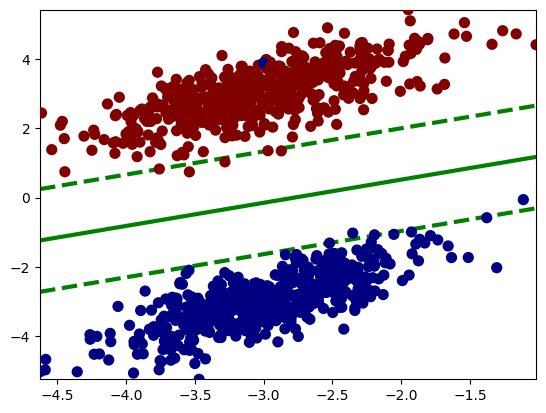

In [176]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

In [177]:
model.coef_, model.intercept_

(array([[-0.45051342,  0.67395905]]), array([-1.25192491]))

### `SVC`

In [194]:
model = SVC(C=1., kernel='linear', probability=True)
model.fit(X, y)

SVC(kernel='linear', probability=True)

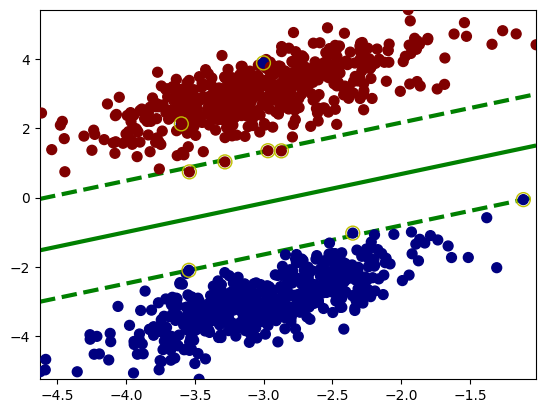

In [208]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

In [197]:
model.coef_, model.intercept_

(array([[-0.56479367,  0.67330386]]), array([-1.58961003]))

In [201]:
model.support_, model.n_support_, model.support_vectors_

(array([154, 225, 770, 808, 902, 115, 208, 819, 930]),
 array([5, 4]),
 array([[-3.59933761,  2.13168499],
        [-3.54362177, -2.0973053 ],
        [-3.00151302,  3.89163354],
        [-1.11101484, -0.05673739],
        [-2.35190906, -1.02402418],
        [-2.96893669,  1.35660636],
        [-3.54068182,  0.74465965],
        [-3.28184747,  1.03332609],
        [-2.87147193,  1.35213726]]))

In [209]:
model.dual_coef_

array([[-1.        , -0.68790674, -1.        , -0.11781006, -1.        ,
         0.80571679,  1.        ,  1.        ,  1.        ]])

### `NuSVC`

In [226]:
model = NuSVC(nu=0.95, kernel='linear', probability=True)
model.fit(X, y)

NuSVC(kernel='linear', nu=0.95, probability=True)

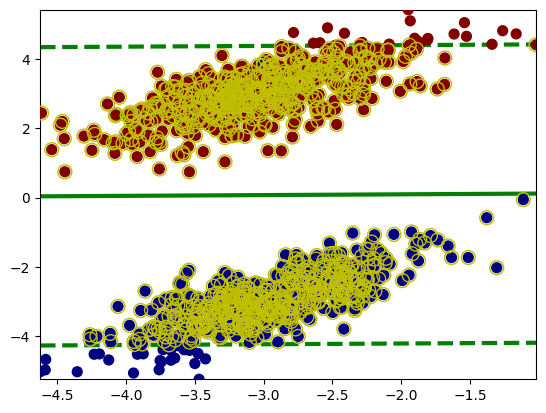

In [227]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

In [228]:
model.predict_proba(X)

array([[3.71368526e-03, 9.96286315e-01],
       [9.99165199e-01, 8.34801014e-04],
       [1.35980713e-02, 9.86401929e-01],
       ...,
       [3.51908096e-03, 9.96480919e-01],
       [9.97351707e-01, 2.64829273e-03],
       [9.97740060e-01, 2.25994031e-03]])

## **🔸 Kernel Trick (sklearn)**

In [262]:
from sklearn.svm import SVC, NuSVC

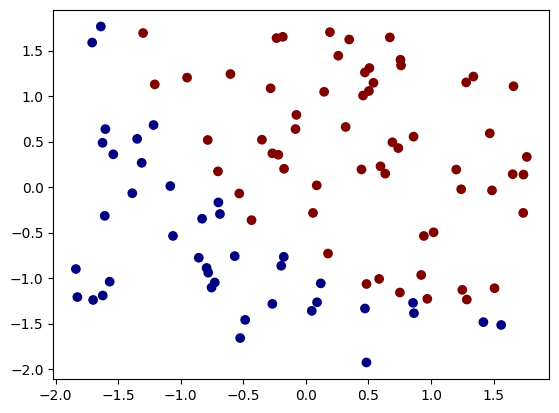

In [263]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

### `SVC`

In [280]:
model = SVC(C=1., kernel='poly', degree=2, coef0=1)
model.fit(X, y)

SVC(coef0=1, degree=2, kernel='poly')

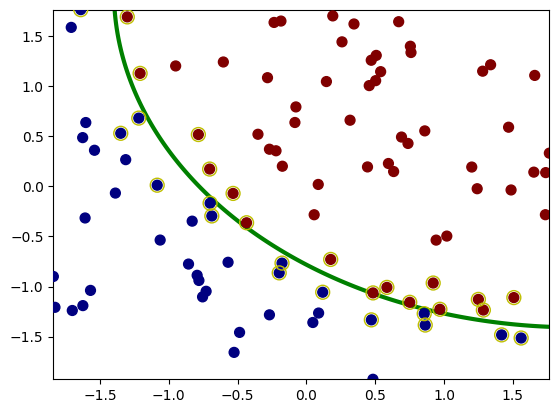

In [281]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

#### Exercise

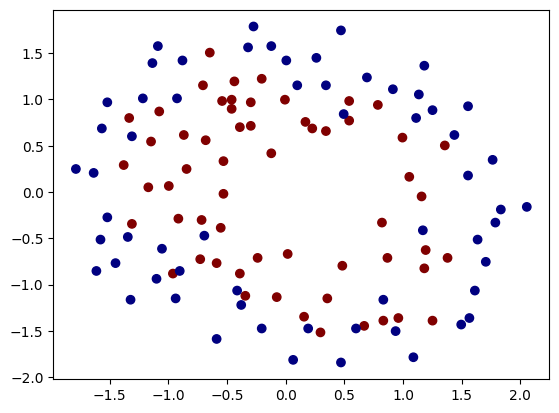

In [261]:
data = np.loadtxt('data/ex2data2.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

### `NuSVC`